In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
df = pd.read_csv("heart.csv")

print("Dataset Loaded Successfully!\n")
print("First 5 Rows:\n", df.head(), "\n")
print("Dataset Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget Column Distribution:\n", df['target'].value_counts())

Dataset Loaded Successfully!

First 5 Rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  10

In [4]:
# Data Preprocessing

X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Decision Tree Performance:
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



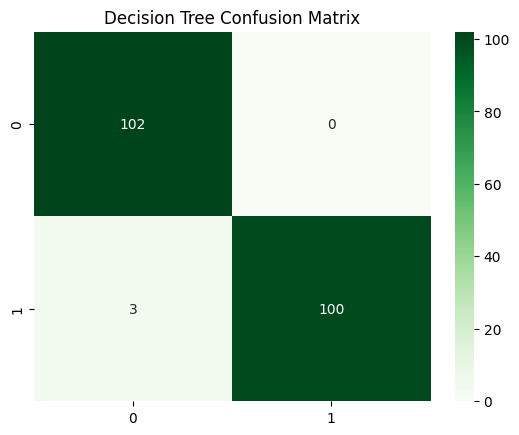

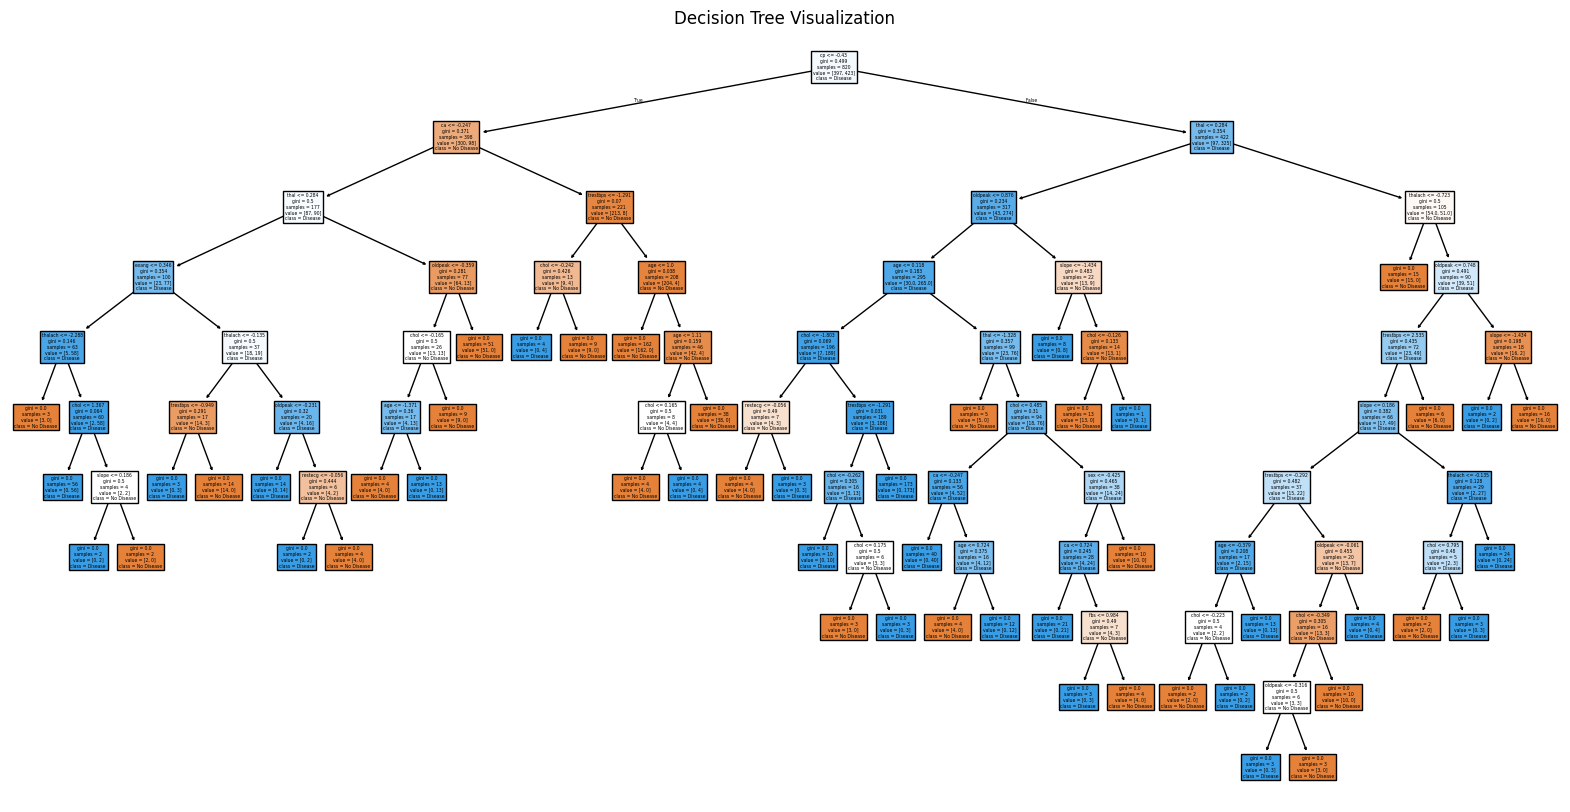

In [7]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease','Disease'])
plt.title("Decision Tree Visualization")
plt.show()


In [9]:
# Control Overfitting (Tune max_depth)

dt_model_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_pruned.fit(X_train, y_train)

y_pred_pruned = dt_model_pruned.predict(X_test)
print("Pruned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

Pruned Decision Tree Accuracy: 0.8


Random Forest Performance:
Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



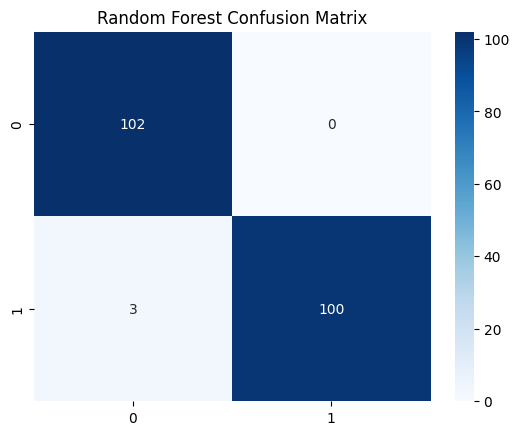

In [10]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

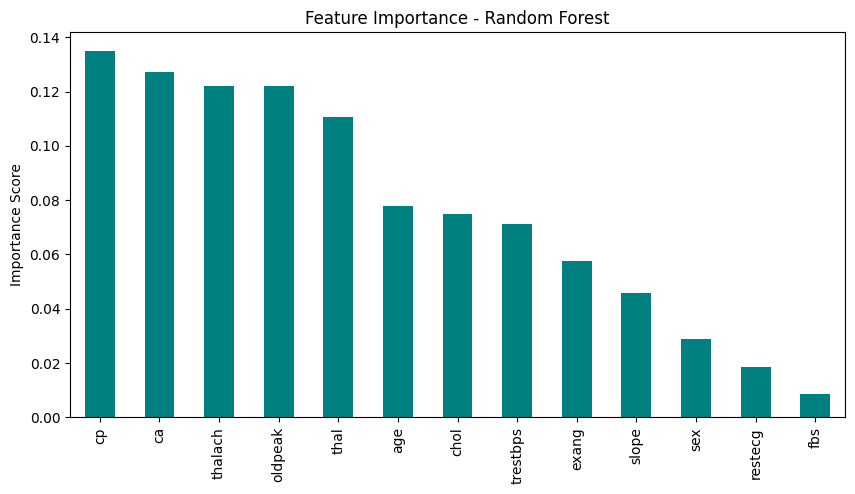

In [11]:
# Feature Importance

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='teal')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

In [12]:
# Cross-Validation

cv_scores_dt = cross_val_score(dt_model, X_scaled, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X_scaled, y, cv=5)

print("Cross Validation (5-Fold):")
print(f"Decision Tree Average Accuracy: {cv_scores_dt.mean():.3f}")
print(f"Random Forest Average Accuracy: {cv_scores_rf.mean():.3f}")

Cross Validation (5-Fold):
Decision Tree Average Accuracy: 1.000
Random Forest Average Accuracy: 0.997


In [14]:
# Summary
print("Decision Tree vs Random Forest Summary:")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"Pruned Decision Tree Accuracy: {accuracy_score(y_test, y_pred_pruned):.3f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")

Decision Tree vs Random Forest Summary:
Decision Tree Accuracy: 0.985
Pruned Decision Tree Accuracy: 0.800
Random Forest Accuracy: 0.985
